{'Field10': None, 'Field2': None, 'Field4': None, 'Field5': None, 'Field6': None, 'Field7': None, 'Field8': None, 'Field9': None, 'Gender': 'Male', 'Hospital_Pref': 'Kanagawa', 'PCR検査実施人数': None, 'PCR検査前日比': None, 'Release': 'Kanagawa Prefecture', 'Residential_Pref': 'Kanagawa', 'X': 139.642347, 'Y': 35.447504, 'キー': '神奈川県', 'ステータス': '退院', 'ソース': 'https://www.mhlw.go.jp/stf/newpage_08906.html', 'ソース2': 'https://www.pref.kanagawa.jp/docs/ga4/bukanshi/occurrence.html', 'ソース3': None, 'チャーター便': None, '確定日': 1579014000000, '確定日YYYYMMDD': 1579014000000, '居住管内': None, '居住市区町村': None, '居住都道府県': '神奈川県', '居住都道府県コード': '14', '勤務先_正誤確認用': None, '厚労省NO': '1 ', '更新日時': 1586173380000, '国内': 'A-1', '死者合計': 0, '受診都道府県': '神奈川県', '受診都道府県コード': '14', '職業_正誤確認用': None, '人数': 1, '性別': '男性', '前日比': 1, '退院数': 1, '退院数累計': 1, '通し': 1, '都道府県内症例番号': '1', '年代': '30 ', '発症数': 0, '発症日': 1577977200000, '発表': '神奈川県', '備考': None, '無症状病原体保有者': None, '累計': 1, 'ObjectId': 1}
{
    "Field10": null,
    "Field2": null,
    "F

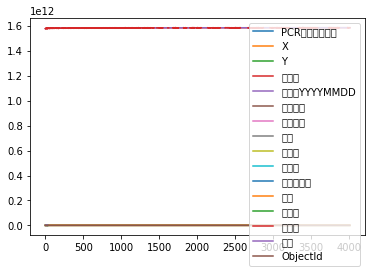

In [1]:
import requests
import json
from typing import Union, Dict, List, Any
from pandas import DataFrame, isnull
from datetime import datetime

uri =  ('https://services6.arcgis.com/5jNaHNYe2AnnqRnS/arcgis/rest/services/COVID19_JapanData/FeatureServer/0'
        '/query?where=%E9%80%9A%E3%81%97%3E0&returnIdsOnly=false&returnCountOnly=false&&f='
        'pgeojson&outFields=*&orderByFields=%E9%80%9A%E3%81%97')
encoding = 'utf-8'
res = requests.get(uri)
print(res.json()["features"][0]["properties"])
print(json.dumps(res.json()["features"][0]["properties"], indent=4, ensure_ascii=False))
propertyies_data = []
for prop in res.json()["features"]:
    propertyies_data.append(prop["properties"])

df = DataFrame(propertyies_data)
print(df["発症日"])
df.plot()

In [2]:
print(len(df))


4013


In [3]:
print(df["死者合計"])

0        0.0
1        0.0
2        0.0
3        0.0
4        NaN
        ... 
4008     NaN
4009     NaN
4010     NaN
4011     NaN
4012    73.0
Name: 死者合計, Length: 4013, dtype: float64


In [6]:
die_sum = []
for i, x in df["死者合計"].iteritems():
    if not isnull(x):
        die_sum.append(x)
print(die_sum)

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 3.0, 4.0, 5.0, 5.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 7.0, 9.0, 12.0, 15.0, 19.0, 21.0, 22.0, 24.0, 28.0, 29.0, 31.0, 33.0, 35.0, 36.0, 41.0, 42.0, 43.0, 45.0, 46.0, 49.0, 52.0, 54.0, 56.0, 57.0, 60.0, 63.0, 69.0, 70.0, 73.0]


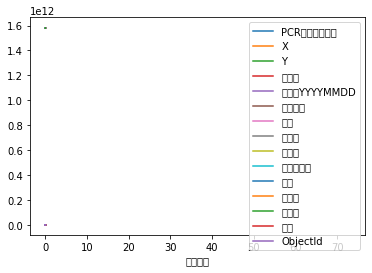

In [10]:
df.plot("死者合計")

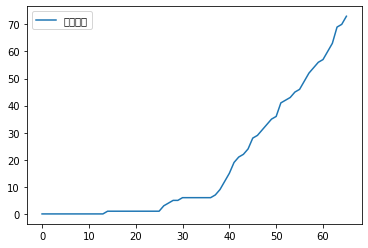

In [19]:
import matplotlib
font = {'family' : 'TakaoGothic'}
matplotlib.rc('font', **font)
die_df = DataFrame(die_sum, columns=[u"死者合計"])
die_df.plot()

In [22]:
datetime.now().timestamp()


1586588290.091137

In [33]:
datetime.fromtimestamp(1586173380000 / 1000).strftime('%Y/%m/%d-%H:%M')

'2020/04/06-20:43'

In [45]:
die_sum.clear()
for i, x in df.iterrows():
    if not isnull(x["死者合計"]) and not isnull(x["発症日"]):
        die_sum.append([datetime.fromtimestamp(float(x["発症日"]) / 1000).strftime('%Y/%m/%d-%H:%M'), x["死者合計"]])

In [46]:
die_sum

[['2020/01/03-00:00', 0.0],
 ['2020/01/14-00:00', 0.0],
 ['2020/01/21-00:00', 0.0],
 ['2020/01/23-00:00', 0.0],
 ['2020/01/26-00:00', 0.0],
 ['2020/01/20-00:00', 0.0],
 ['2020/02/01-00:00', 0.0],
 ['2020/01/25-00:00', 0.0],
 ['2020/02/07-00:00', 0.0],
 ['2020/02/07-00:00', 0.0],
 ['2020/02/02-00:00', 1.0],
 ['2020/02/17-00:00', 1.0],
 ['2020/02/16-00:00', 1.0],
 ['2020/02/15-00:00', 1.0],
 ['2020/02/12-00:00', 1.0],
 ['2020/02/22-00:00', 1.0],
 ['2020/02/24-00:00', 1.0],
 ['2020/02/20-00:00', 1.0],
 ['2020/02/20-00:00', 3.0],
 ['2020/02/14-00:00', 4.0],
 ['2020/02/23-00:00', 5.0],
 ['2020/02/15-00:00', 5.0],
 ['2020/02/27-00:00', 6.0],
 ['2020/02/16-00:00', 6.0],
 ['2020/02/22-00:00', 6.0],
 ['2020/02/26-00:00', 6.0],
 ['2020/02/26-00:00', 6.0],
 ['2020/03/06-00:00', 6.0],
 ['2020/02/28-00:00', 7.0],
 ['2020/02/24-00:00', 9.0],
 ['2020/03/07-00:00', 12.0],
 ['2020/03/09-00:00', 15.0],
 ['2020/03/14-00:00', 21.0],
 ['2020/03/14-00:00', 24.0],
 ['2020/03/09-00:00', 28.0],
 ['2020/03/13-0

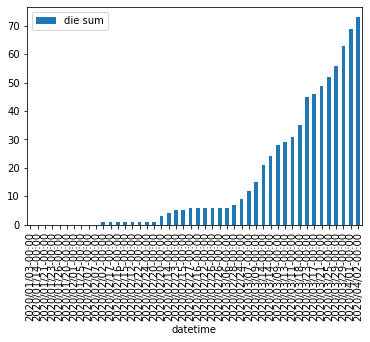

In [49]:
die_df = DataFrame(die_sum, columns=["datetime", "die sum"])
die_df.plot.bar(x="datetime")